In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
%matplotlib inline
#%matplotlib qt

#יצירת בסיס הנתונים והרשת

<div dir=RTL> הפונקציה avr_img מקבלת מערך המכיל תמונה, וממצעת אותו למערך המכיל rows X cols פיקסלים. </div>

In [2]:
def avr_img(img,rows,cols):
    mean_image=np.zeros((rows,cols))
    dr,dc=img.shape[0]/rows,img.shape[1]/cols
    for r in range(0,rows):
        for c in range(0,cols):
            mean_image[r,c]=img[r*dr:r*dr+dr,c*dc:c*dc+dc].mean()
    return mean_image

הפונקציה מקבלת מערך תמונות ומציגה אותה מפוקסלת

In [3]:
def show(image):
    plt.imshow(image,cmap=plt.cm.gray,interpolation='none')
    plt.show()

הפונקציה מקבלת מערך, מספר שורות ועמודות ומסדרת אותו לוקטור

In [4]:
def convert_to_array(images,rows,cols):
    for i in range(len(images)):
        images[i]=images[i].reshape(rows*cols)
    images_list=[]
    for i in range(len(images)):
        images_list.append(images[i])
    images_list=np.array(images_list)
    return images_list

הפונקציה מקבלת מערך תמונה ארגיבי ומסדרת אותו לוקטור

In [5]:
def rgb_convert_to_array(small_images,rows,cols):
    for i in range(len(small_images)):
        small_images[i]=small_images[i].reshape(rows*cols,3)
        small_images[i]=small_images[i].reshape(rows*cols*3)
    images_list=[]
    for i in range(len(small_images)):
        images_list.append(small_images[i])
    images_list=np.array(images_list)
    return images_list

הפעולה מקבלת מערך תמונות בגודל 2 על 2 ומחזירה את כל ההפרשים בין הפיקסלים

In [6]:
def get_differences(small_images):
    differences=[]
    for i in range(len(small_images)):
        differences.append(small_images[i][0][0]-small_images[i][0][1])
        differences.append(small_images[i][0][0]-small_images[i][1][1])
        differences.append(small_images[i][0][0]-small_images[i][1][0])
        #--------------------------------------------------------------
        differences.append(small_images[i][0][1]-small_images[i][0][0])
        differences.append(small_images[i][0][1]-small_images[i][1][0])
        differences.append(small_images[i][0][1]-small_images[i][1][1])
        #--------------------------------------------------------------
        differences.append(small_images[i][1][1]-small_images[i][1][0])
        differences.append(small_images[i][1][1]-small_images[i][0][0])
        differences.append(small_images[i][1][1]-small_images[i][0][1])
        #--------------------------------------------------------------
        differences.append(small_images[i][1][0]-small_images[i][0][0])
        differences.append(small_images[i][1][0]-small_images[i][0][1])
        differences.append(small_images[i][1][0]-small_images[i][1][1])
    return differences

יבוא התמונות

In [11]:
from PIL import Image
images=[]
#location='F:/School/moah/WinPython-64bit-2.7.10.2/notebooks/docs/siduri/'
location='F:/Users/Nadav/OneDrive/WinPython-64bit-2.7.10.2/notebooks/docs/Siduri sky images from google/'
for k in range(150):
    name=str(k)+'.JPG'
    img = Image.open(location+name)
    images.append(img)

שכפול רשימת התמונות לרשימה חדשה

In [7]:
small_images=images

ניתן להשתמש בפונקציה הבאה אך היא איטית יותר

In [14]:
small_images = copy.deepcopy(images)

הקטנת התמונות ברשימה החדשה, משום מה גם התמונות ברשימה המקורית מוקטנות. לכן יש להריץ שוב את יבוא התמונות בשלב זה

In [17]:
k=1
for i in range(len(small_images)):
    cols,rows=small_images[i].size
    small_images[i].thumbnail((cols/320*k, rows/320*k), Image.ANTIALIAS)

In [76]:
k=1
for i in range(len(small_images)):
    cols,rows=small_images[i].size
    small_images[i]=small_images[i].resize((2, 2), Image.ANTIALIAS)

בדיקה שהתמונות אכן הוקטנו, צריכים להתקבל בתחילה ערכים גבוהים ולאחר מכן נמוכים

In [18]:
print images[0].size
print small_images[0].size

(960, 1280)
(3, 4)


המרת רשימת התמונות המוקטנות לרשימת תמונות מוקטנות בצורת מערך כלומר כל תמונה היא מערך

In [19]:
for i in range(len(small_images)):
    small_images[i]=np.array(small_images[i])

המרת רשימת התמונות המקוריות לרשימת תמונות מקוריות בצורת מערך

In [20]:
images_arr=[]
for i in range(len(images)):
    images_arr.append(np.array(images[i]))

In [8]:
type(images_arr[0])

numpy.ndarray

מיצוע התמונות המקוריות

In [73]:
k=7 #level of clarity, k<816
avr_images=[avr_img(i,i.shape[0]/816*k,i.shape[1]/816*k) for i in images_arr]
#avr_images=[avr_img(i[:,:,1],8,8) for i in images]

הפיכת רשימת התמונות שעברו מיצוע למערך תמונות, ויצירת 3 מערכי תמונות מסובבות

In [13]:
avr_images=np.array(avr_images)
avr_images_90=[np.rot90(i,-1) for i in avr_images]
avr_images_90=np.array(avr_images_90)
avr_images_180=[np.rot90(i,-2) for i in avr_images]
avr_images_180=np.array(avr_images_180)
avr_images_270=[np.rot90(i,-3) for i in avr_images]
avr_images_270=np.array(avr_images_270)

NameError: name 'avr_images' is not defined

הפיכת רשימת התמונות המוקטנות למערך תמונות, ויצירת 3 מערכי תמונות מסובבות

In [21]:
small_images=np.array(small_images)
small_images_90=[np.rot90(i,-1) for i in small_images]
small_images_90=np.array(small_images_90)
small_images_180=[np.rot90(i,-2) for i in small_images]
small_images_180=np.array(small_images_180)
small_images_270=[np.rot90(i,-3) for i in small_images]
small_images_270=np.array(small_images_270)

יצירת רשימות הפרשים גודל מספר התמונות על 12

In [81]:
small_differences=get_differences(small_images)
small_differences_90=get_differences(small_images_90)
small_differences_180=get_differences(small_images_180)
small_differences_270=get_differences(small_images_270)

In [82]:
small_differences=np.array(small_differences)
small_differences_90=np.array(small_differences_90)
small_differences_180=np.array(small_differences_180)
small_differences_270=np.array(small_differences_270)

In [83]:
small_differences=small_differences.reshape(150,36)
small_differences_90=small_differences_90.reshape(150,36)
small_differences_180=small_differences_180.reshape(150,36)
small_differences_270=small_differences_270.reshape(150,36)

המרת המערכים החדשים לוקטורים

In [76]:
avr_images=convert_to_array(avr_images,28,21)
avr_images_90=convert_to_array(avr_images_90,28,21)
avr_images_180=convert_to_array(avr_images_180,28,21)
avr_images_270=convert_to_array(avr_images_270,28,21)

In [22]:
small_images_list=[]
small_images_list_90=[]
small_images_list_180=[]
small_images_list_270=[]
for i in range(len(small_images)):
    small_images_list.append(small_images[i].reshape(36))
    small_images_list_90.append(small_images_90[i].reshape(36))
    small_images_list_180.append(small_images_180[i].reshape(36))
    small_images_list_270.append(small_images_180[i].reshape(36))

In [23]:
small_images=small_images_list
small_images_90=small_images_list_90
small_images_180=small_images_list_180
small_images_270=small_images_list_270

In [19]:
#small_images=rgb_convert_to_array(small_images,8,6)
#small_images_90=rgb_convert_to_array(small_images_90,8,6)
#small_images_180=rgb_convert_to_array(small_images_180,8,6)
#small_images_270=rgb_convert_to_array(small_images_270,8,6)

יצירת ערכי מטרה

In [ ]:
avr_images_target=[]
avr_images_90_target=[]
avr_images_180_target=[]
avr_images_270_target=[]
for i in range(len(avr_images)):
    avr_images_target.append([1,0,0,0])
    avr_images_90_target.append([0,1,0,0])
    avr_images_180_target.append([0,0,1,0])
    avr_images_270_target.append([0,0,0,1])

In [24]:
small_images_target=[]
small_images_90_target=[]
small_images_180_target=[]
small_images_270_target=[]
for i in range(len(small_images)):
    small_images_target.append([1,0,0,0])
    small_images_90_target.append([0,1,0,0])
    small_images_180_target.append([0,0,1,0])
    small_images_270_target.append([0,0,0,1])

הפיכת ערכי המטרה למערכים

In [ ]:
avr_images_target=np.array(avr_images_target)
avr_images_90_target=np.array(avr_images_90_target)
avr_images_180_target=np.array(avr_images_180_target)
avr_images_270_target=np.array(avr_images_270_target)

In [25]:
small_images_target=np.array(small_images_target)
small_images_90_target=np.array(small_images_90_target)
small_images_180_target=np.array(small_images_180_target)
small_images_270_target=np.array(small_images_270_target)

יצירת מערך תמונות כולל ומערך ערכי מטרה כולל, כאשר המערכים מתואמים

In [80]:
total_avr_images=np.vstack((avr_images,avr_images_90,avr_images_180,avr_images_270))
total_avr_images_targets=np.vstack((avr_images_target,avr_images_90_target,avr_images_180_target,avr_images_270_target))

יצירת בסיס לבסיס נתונים הכולל תמונות וערכי מטרה

In [82]:
avr_images_inputs_targets=np.column_stack((range(len(total_avr_images)),total_avr_images,total_avr_images_targets))

In [83]:
np.set_printoptions(threshold=np.nan)

אותה פעולה עבור התמונות המוקטנות

In [26]:
total_small_images=np.vstack((small_images,small_images_90,small_images_180,small_images_270))
total_small_images_targets=np.vstack((small_images_target,small_images_90_target,small_images_180_target,small_images_270_target))

In [27]:
small_images_inputs_targets=np.column_stack((range(len(total_small_images)),total_small_images,total_small_images_targets))

In [28]:
small_images_inputs_targets.shape

(600L, 41L)

כולל הפרשים

In [88]:
total_small_images=np.column_stack((small_images,small_differences))
total_small_images_90=np.column_stack((small_images_90,small_differences_90))
total_small_images_180=np.column_stack((small_images_180,small_differences_180))
total_small_images_270=np.column_stack((small_images_270,small_differences_270))

In [89]:
total_small_images=np.vstack((total_small_images,total_small_images_90,total_small_images_180,total_small_images_270))

In [90]:
total_small_images_targets=np.vstack((small_images_target,small_images_90_target,small_images_180_target,small_images_270_target))

In [91]:
small_images_inputs_targets=np.column_stack((range(len(total_small_images)),total_small_images,total_small_images_targets))

חלוקה לקבוצות למידה ובחינה

In [32]:
from sklearn.cross_validation import train_test_split

In [ ]:
avr_x_train,avr_x_test,avr_y_train,avr_y_test=train_test_split(avr_images_inputs_targets[:,:-4],avr_images_inputs_targets[:,-4:],test_size=1/4.0)

In [25]:
small_x_train,small_x_test,small_y_train,small_y_test=train_test_split(small_images_inputs_targets[:,:-4],small_images_inputs_targets[:,-4:],test_size=1/4.0)

יבוא ספריות הלמידה

In [33]:
from pybrain.tools.shortcuts import buildNetwork
from pybrain.tools.shortcuts import SigmoidLayer
from pybrain.datasets import SupervisedDataSet
from pybrain.supervised.trainers import BackpropTrainer

יצירת הרשתות, אופטימלי:
best small net is 576, 174, 4
best avr net is 588, 47, 4

In [ ]:
avr_net=buildNetwork(588,47,4,bias=True,hiddenclass=SigmoidLayer,outclass=SigmoidLayer)

In [27]:
small_net=buildNetwork(144,216,4,bias=True,hiddenclass=SigmoidLayer,outclass=SigmoidLayer)

יצירת המבנה של בסיס הנתונים

In [ ]:
avr_train_ds=SupervisedDataSet(588,4)
avr_test_ds=SupervisedDataSet(588,4)

In [28]:
small_train_ds=SupervisedDataSet(144,4)
small_test_ds=SupervisedDataSet(144,4)

הגדרת בסיס הנתונים ללמידה ולבחינה

In [ ]:
avr_train_ds.setField('input',avr_x_train[:,1:])
avr_train_ds.setField('target',avr_y_train)
avr_test_ds.setField('input',avr_x_test[:,1:])
avr_test_ds.setField('target',avr_y_test)

In [29]:
small_train_ds.setField('input',small_x_train[:,1:])
small_train_ds.setField('target',small_y_train)
small_test_ds.setField('input',small_x_test[:,1:])
small_test_ds.setField('target',small_y_test)

התאמת האינדקסים

In [ ]:
avr_train_indexes=avr_x_train[:,0]
avr_test_indexes=avr_x_test[:,0]

In [30]:
small_train_indexes=small_x_train[:,0]
small_test_indexes=small_x_test[:,0]

שמירת בסיס הנתונים

In [ ]:
#d={'index':avr_train_indexes,'data':avr_train_ds}

avr_train_ds.saveToFile('avr_train_ds_28X21')
avr_test_ds.saveToFile('avr_test_ds_28X21')

In [31]:
small_train_ds.saveToFile('small_train_ds_8X6X3')
small_test_ds.saveToFile('small_test_ds_8X6X3')

שמירת האינדקסים

In [ ]:
np.save('avr_train_indexes_28X21.npy',avr_train_indexes)
np.save('avr_test_indexes_28X21.npy',avr_test_indexes)

In [32]:
np.save('small_train_indexes_8X6X3.npy',small_train_indexes)
np.save('small_test_indexes_8X6X3.npy',small_test_indexes)

**ניתן לדלג לשלב זה אם יש כבר בסיסי נתונים שמורים**

In [ ]:
avr_train_ds=SupervisedDataSet.loadFromFile('avr_train_ds_28X21')
avr_test_ds=SupervisedDataSet.loadFromFile('avr_test_ds_28X21')

In [34]:
small_train_ds=SupervisedDataSet.loadFromFile('small_train_ds_4X3X3')
small_test_ds=SupervisedDataSet.loadFromFile('small_test_ds_4X3X3')

In [35]:
type(small_train_ds)

pybrain.datasets.supervised.SupervisedDataSet

In [ ]:
avr_train_indexes=np.load('avr_train_indexes_28X21.npy')
avr_test_indexes=np.load('avr_test_indexes_28X21.npy')

In [12]:
small_train_indexes=np.load('small_train_differences_indexes_2X2X3+12X3.npy')
small_test_indexes=np.load('small_test_differences_indexes_2X2X3+12X3.npy')

הגדרת המאמנים

In [ ]:
avr_trainer=BackpropTrainer(avr_net,avr_train_ds)

In [33]:
small_trainer=BackpropTrainer(small_net,small_train_ds)

#אימון הרשת

הפונציה מקבלת רשת ובסיס נתונים ומחזירה שגיאה באחוזים

In [39]:
def get_err_in_percent(net,ds):
    h=net.activateOnDataset(ds)
    return 100-sum(h.argmax(axis=1)==ds['target'].argmax(axis=1))/float(ds['target'].shape[0])*100

In [66]:
err_percent=[]
test_err_percent=[]

אימון רשת התמונות הממוצעות

In [77]:
train_err, val_err=avr_trainer.trainUntilConvergence(maxEpochs=1000,continueEpochs=300,validationProportion=1/3.0)

NameError: name 'avr_trainer' is not defined

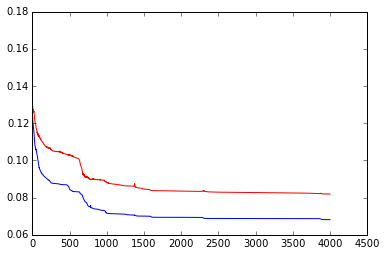

In [242]:
plt.plot(train_err,'b-')
plt.plot(val_err,'r-')

תוצאת האימון

In [243]:
avr_train_result=get_err_in_percent(avr_net,avr_train_ds)
avr_train_result

52.333333333333329

תוצאת הבחינה

In [244]:
avr_test_result=get_err_in_percent(avr_net,avr_test_ds)
avr_test_result

53.0

In [103]:
h_train=avr_net.activateOnDataset(avr_train_ds)

המרת תוצר הרשת למבנה בינארי

In [104]:
h_train_list=[]
for i in range(h_train.shape[0]):
    h_train_list.append(np.where(h_train[i]==max(h_train[i]),1,0))

In [105]:
h_train_arr=np.array(h_train_list)

יצירת מערך תמונות כפי שקיבלה הרשת

In [106]:
avr_train_pics=[]
for i in range(len(avr_train_ds['input'])):
    index=avr_x_train[i,0]
    index=int(index)
    if index<99 or (index>=200 and index<=299):
        if index%100<=45:
            avr_train_pics.append(avr_train_ds['input'][i].reshape(28,21))
        else:
            avr_train_pics.append(avr_train_ds['input'][i].reshape(21,28))
    else:
        if index%100<=45:
            avr_train_pics.append(avr_train_ds['input'][i].reshape(21,28))
        else:
            avr_train_pics.append(avr_train_ds['input'][i].reshape(28,21))

true value: [ 0.  0.  0.  1.] net value: [1 0 0 0] 382.0


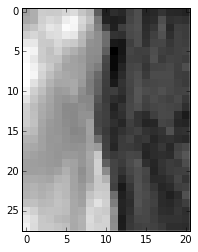

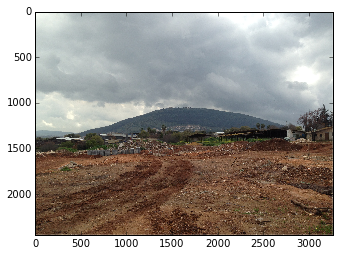

In [121]:
k=7
print "true value:",avr_train_ds['target'][k],"net value:", h_train_arr[k], avr_train_indexes[k]
show(avr_train_pics[k])
show(images[int(avr_train_indexes[k])%100])

אותו דבר לגבי התמונות המוקטנות

In [35]:
small_train_err, small_val_err=small_trainer.trainUntilConvergence(maxEpochs=5000,continueEpochs=1000,validationProportion=1/3.0)

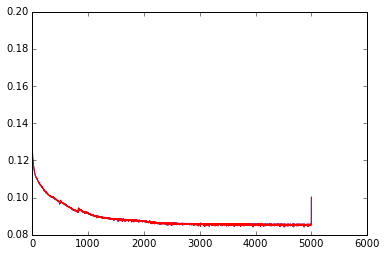

In [36]:
plt.plot(small_train_err,'b-')
plt.plot(small_train_err,'r-')

In [44]:
small_train_result=get_err_in_percent(small_net,small_train_ds)
small_train_result

5.33


In [41]:
small_test_result=get_err_in_percent(small_net,small_test_ds)
small_test_result

10.0

In [21]:
small_h_train=small_net.activateOnDataset(small_train_ds)
small_h_train_list=[]
for i in range(small_h_train.shape[0]):
    small_h_train_list.append(np.where(small_h_train[i]==max(small_h_train[i]),1,0))
small_h_train_arr=np.array(small_h_train_list)

In [25]:
small_train_pics=[]
for i in range(len(small_train_ds['input'])):
    small_train_pics.append(small_train_ds['input'][:,:12][i].reshape(2,2,3))

In [17]:
small_train_pics=[]
for i in range(len(small_train_ds['input'])):
    index=small_train_indexes[i]
    index=int(index)
    if index<99 or (index>=200 and index<=299):
        if index%100<=45:
            small_train_pics.append(small_train_ds['input'][i].reshape(4,3,3))
        else:
            small_train_pics.append(small_train_ds['input'][i].reshape(3,4,3))
    else:
        if index%100<=45:
            small_train_pics.append(small_train_ds['input'][i].reshape(3,4,3))
        else:
            small_train_pics.append(small_train_ds['input'][i].reshape(4,3,3))

In [26]:
failed_indexes=[]
for i in range(len(small_train_ds['target'])):
    if(sum(abs(small_train_ds['target'][i]-small_h_train_arr[i]))!=0):
        failed_indexes.append(i)

true value: [1 0 0 0] net value: [1 0 0 0] 29


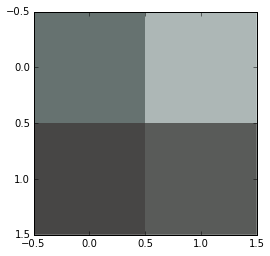

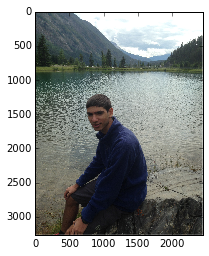

In [30]:
k=1
print "true value:",small_train_ds['target'][k],"net value:", small_h_train_arr[k], small_train_indexes[k]
show(256-small_train_pics[k])
show(images[int(small_train_indexes[k])%100])

true value: [0 1 0 0] net value: [1 0 0 0] 128


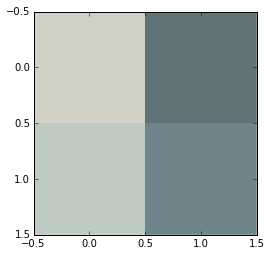

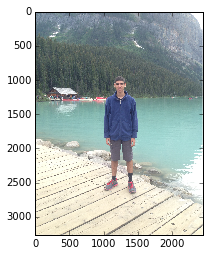

In [31]:
from IPython.html.widgets import interact
@interact
def ss(i=(0,len(failed_indexes)-1)):
    k=failed_indexes[i]
    print "true value:",small_train_ds['target'][k],"net value:", small_h_train_arr[k], small_train_indexes[k]
    show(256-small_train_pics[k])
    show(images[int(small_train_indexes[k])%100])

In [204]:
small_h_test=small_net.activateOnDataset(small_test_ds)
small_h_test_list=[]
for i in range(small_h_test.shape[0]):
    small_h_test_list.append(np.where(small_h_test[i]==max(small_h_test[i]),1,0))
small_h_test_arr=np.array(small_h_test_list)

In [206]:
small_test_pics=[]
for i in range(len(small_test_ds['input'])):
    index=small_test_indexes[i]
    index=int(index)
    if index<99 or (index>=200 and index<=299):
        if index%100<=45:
            small_test_pics.append(small_test_ds['input'][i].reshape(16,12,3))
        else:
            small_test_pics.append(small_test_ds['input'][i].reshape(12,16,3))
    else:
        if index%100<=45:
            small_test_pics.append(small_test_ds['input'][i].reshape(12,16,3))
        else:
            small_test_pics.append(small_test_ds['input'][i].reshape(16,12,3))

In [207]:
failed_test_indexes=[]
for i in range(len(small_test_ds['target'])):
    if(sum(abs(small_test_ds['target'][i]-small_h_test_arr[i]))!=0):
        failed_test_indexes.append(i)

In [208]:
failed_test_indexes

[9,
 10,
 23,
 27,
 33,
 35,
 36,
 40,
 43,
 44,
 54,
 56,
 60,
 61,
 62,
 63,
 73,
 84,
 86,
 94,
 97,
 98]

true value: [1 0 0 0] net value: [0 0 0 1] 34


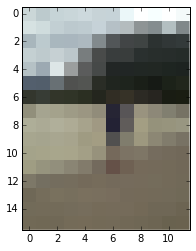

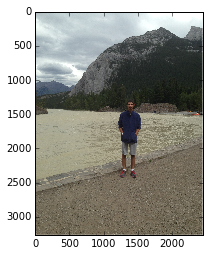

In [214]:
k=27
print "true value:",small_test_ds['target'][k],"net value:", small_h_test_arr[k], small_test_indexes[k]
show(256-small_test_pics[k])
show(images[int(small_test_indexes[k])%100])

In [129]:
for i in range(500):
    small_trainer.train()
    small_err.append(get_err(small_net,small_train_ds))
    small_test_err.append(get_err(small_net,small_test_ds))
    small_err_percent.append(get_err_in_percent(small_net,small_train_ds))
    small_test_err_percent.append(get_err_in_percent(small_net,small_test_ds))

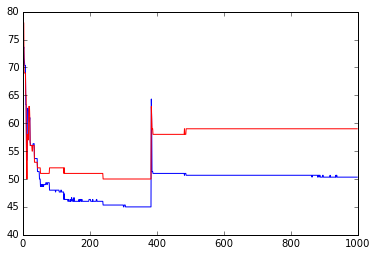

In [130]:
#plt.plot(small_err_percent,'b-')
#plt.plot(small_test_err_percent,'r-')

In [172]:
small_train_result=get_err_in_percent(small_net,small_train_ds)
small_train_result

9.6666666666666714

In [173]:
small_test_result=get_err_in_percent(small_net,small_test_ds)
small_test_result

23.0

מציאת רשת אופטימלית

In [35]:
avr_nets=[]
avr_err=[]
min_avr_err=[]
small_nets=[]
small_err=[]
min_small_err=[]
for k in range(1,101):
    print k
    avr_net=buildNetwork(588,k,4,bias=True,hiddenclass=SigmoidLayer,outclass=SigmoidLayer)
    small_net=buildNetwork(576,k,4,bias=True,hiddenclass=SigmoidLayer,outclass=SigmoidLayer)
    avr_trainer=BackpropTrainer(avr_net,avr_train_ds)
    small_trainer=BackpropTrainer(small_net,small_train_ds)
    avr_err.append(avr_trainer.trainUntilConvergence(maxEpochs=500,continueEpochs=10,validationProportion=1/3.0))
    small_err.append(small_trainer.trainUntilConvergence(maxEpochs=500,continueEpochs=10,validationProportion=1/3.0))
    avr_nets.append(avr_net)
    small_nets.append(small_net)

for e in avr_err:
    min_avr_err.append(min(e[1]))
for e in small_err:
    min_small_err.append(min(e[1]))    
avr_idx=min_avr_err.index(min(min_avr_err))
small_idx=min_small_err.index(min(min_small_err))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


In [51]:
#avr_idx=47
#small_idx=87

0.0307820252222


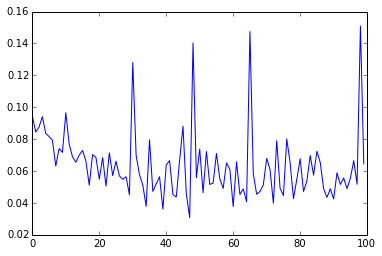

In [40]:
plt.plot(min_avr_err)
print (min_avr_err[avr_idx])

0.0358640985228


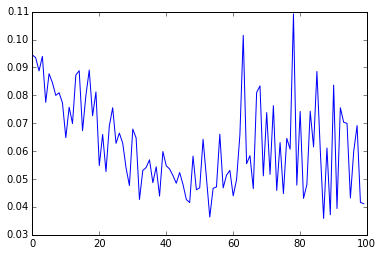

In [41]:
plt.plot(min_small_err)
print (min_small_err[small_idx])

In [45]:
avr_train_result=get_err_in_percent(avr_nets[avr_idx],avr_train_ds)
avr_train_result

14.0

In [46]:
small_train_result=get_err_in_percent(small_net,small_train_ds)
small_train_result

10.0

In [47]:
avr_test_result=get_err_in_percent(avr_nets[avr_idx],avr_test_ds)
avr_test_result

18.0

In [48]:
small_test_result=get_err_in_percent(small_nets[small_idx],small_test_ds)
small_test_result

20.0

In [52]:
for k in range(201,301):
    print k
    avr_net=buildNetwork(588,k,4,bias=True,hiddenclass=SigmoidLayer,outclass=SigmoidLayer)
    small_net=buildNetwork(576,k,4,bias=True,hiddenclass=SigmoidLayer,outclass=SigmoidLayer)
    avr_trainer=BackpropTrainer(avr_net,avr_train_ds)
    small_trainer=BackpropTrainer(small_net,small_train_ds)
    avr_err.append(avr_trainer.trainUntilConvergence(maxEpochs=500,continueEpochs=10,validationProportion=1/3.0))
    small_err.append(small_trainer.trainUntilConvergence(maxEpochs=500,continueEpochs=10,validationProportion=1/3.0))
    avr_nets.append(avr_net)
    small_nets.append(small_net)

for e in avr_err:
    min_avr_err.append(min(e[1]))
for e in small_err:
    min_small_err.append(min(e[1]))    
avr_idx=min_avr_err.index(min(min_avr_err))
small_idx=min_small_err.index(min(min_small_err))

201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300


In [57]:
avr_idx

47

In [54]:
small_idx

234

In [56]:
min_small_err[87]

0.035864098522782495

In [55]:
min_small_err[small_idx]

0.0336736318966065

In [56]:
#c_image=[]
#for r in xrange(rm.shape[0]):
#    row=[]
#    for c in xrange(rm.shape[1]):
#        row.append([rm[r,c],gm[r,c],bm[r,c]])
#    c_image.append(row)
#c_image=np.array(c_image)
        

In [69]:
#i=images[0]
#rm,gm,bm=avr_img(i[:,:,0],32,24),avr_img(i[:,:,1],32,24),avr_img(i[:,:,2],32,24)

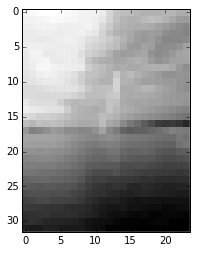

In [74]:
#show(images[0])
show(bm)

90 מעלות עם כיוון השעון

In [3]:
def rotate90(image):
    return image.T[:,-1::-1]

180 מעלות

In [4]:
def rotate180(image):
    return image[-1::-1,-1::-1]

270 מעלות

In [5]:
def rotate270(image):
    return image[:,-1::-1].T

In [56]:
help(np.column_stack)

Help on function column_stack in module numpy.lib.shape_base:

column_stack(tup)
    Stack 1-D arrays as columns into a 2-D array.
    
    Take a sequence of 1-D arrays and stack them as columns
    to make a single 2-D array. 2-D arrays are stacked as-is,
    just like with `hstack`.  1-D arrays are turned into 2-D columns
    first.
    
    Parameters
    ----------
    tup : sequence of 1-D or 2-D arrays.
        Arrays to stack. All of them must have the same first dimension.
    
    Returns
    -------
    stacked : 2-D array
        The array formed by stacking the given arrays.
    
    See Also
    --------
    hstack, vstack, concatenate
    
    Examples
    --------
    >>> a = np.array((1,2,3))
    >>> b = np.array((2,3,4))
    >>> np.column_stack((a,b))
    array([[1, 2],
           [2, 3],
           [3, 4]])



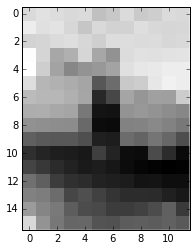

In [199]:
show(np.rot90(avr_images[28],-2))

In [200]:
x=2

In [203]:
a=[1,2,3]

In [204]:
a[0]

1

In [206]:
max(a)

3

שאלות לשלמה:
1. בעבר קיבלתי תוצאות שונות, מדוע זה קורה?
2. כמה מחזורי למידה להריץ? לכאורה כמה שיותר מחזורים יותר טוב
3. העלאת רזולוציה פוגעת בתוצאות, מדוע?
4. האם בהגדרת המאמנים אני יכול להשתמש רק בחלק מהדטסט? המטרה היא לשמור אינדקסים בנפרד כדי שאוכל להשתמש בהם אחר כך.
5. רוצה כבר להתקדם לשלב הבא של רשת אוניברסלית, כזאת שאני לא מגדיר לה את גודל התמונה. אפשרי? (אולי מתיחת התמונה)
6. האם הרשת מתייחסת לסיכוי שתמונה היא ישרה? לצורך העניין, בתיקיות מציאותיות בערך שבעים אחוז מהתמונות ישרות

In [36]:
ls

 Volume in drive E is Lexar
 Volume Serial Number is 473C-DD07

 Directory of E:\School\moah\WinPython-64bit-2.7.10.2\notebooks\Nadav Halahmi

09/07/2015  07:33 PM    <DIR>          .
09/07/2015  07:33 PM    <DIR>          ..
09/07/2015  05:46 PM    <DIR>          .ipynb_checkpoints
04/24/2016  07:30 PM         7,564,273 avr_test_ds
05/17/2016  11:20 PM         1,153,280 avr_test_ds_28X21
05/15/2016  03:34 PM         7,584,509 avr_test_ds_72X54
05/17/2016  02:37 PM               880 avr_test_indexes_28X21.npy
04/24/2016  07:30 PM        22,717,643 avr_train_ds
04/21/2016  01:16 PM         1,440,108 avr_train_ds.npy
05/17/2016  11:20 PM         3,458,540 avr_train_ds_28X21
05/15/2016  03:34 PM        22,697,407 avr_train_ds_72X54
05/17/2016  02:37 PM             2,480 avr_train_indexes_28X21.npy
10/07/2015  07:13 PM           436,969 Gradient descent - Nadav Halahmi.ipynb
04/19/2016  03:40 PM       743,386,545 images.lst.npy
04/19/2016  03:35 PM                 0 images.npy
04/24/2016  

In [42]:
small_train_pics[k]

array([[[ 55, 103, 146],
        [ 54, 101, 146],
        [ 53, 100, 145],
        [ 52,  99, 145],
        [ 52,  98, 146],
        [ 53,  99, 146],
        [ 54,  99, 147],
        [ 54,  99, 147],
        [ 54,  99, 148],
        [ 54,  99, 149],
        [ 55, 100, 149],
        [ 57, 101, 150],
        [ 58, 102, 150],
        [ 59, 102, 148],
        [ 58, 104, 152],
        [ 64, 102, 139]],

       [[ 63, 112, 154],
        [ 62, 111, 155],
        [ 62, 110, 155],
        [ 62, 110, 155],
        [ 62, 110, 155],
        [ 62, 109, 155],
        [ 62, 108, 154],
        [ 64, 110, 156],
        [ 64, 111, 158],
        [ 65, 111, 159],
        [ 66, 112, 159],
        [ 67, 112, 160],
        [ 69, 112, 158],
        [ 71, 118, 167],
        [ 72, 101, 134],
        [ 82,  83,  83]],

       [[ 77, 124, 163],
        [ 75, 122, 162],
        [ 74, 121, 163],
        [ 75, 122, 164],
        [ 76, 121, 163],
        [ 77, 123, 169],
        [ 82, 129, 177],
        [ 81, 125, 17

In [84]:
small_nets=[]
small_err=[]
min_small_err=[]
for k in range(1,101):
    print k
    small_net=buildNetwork(36,k,4,bias=True,hiddenclass=SigmoidLayer,outclass=SigmoidLayer)
    small_trainer=BackpropTrainer(small_net,small_train_ds)
    small_err.append(small_trainer.trainUntilConvergence(maxEpochs=5000,continueEpochs=500,validationProportion=1/3.0))
    small_nets.append(small_net)

for e in small_err:
    min_small_err.append(min(e[1]))    
small_idx=min_small_err.index(min(min_small_err))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


69 0.0222122222513


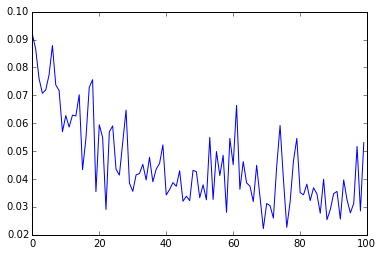

In [86]:
plt.plot(min_small_err)
print small_idx,(min_small_err[small_idx])

In [46]:
small_train_result=get_err_in_percent(small_net,small_train_ds)
small_train_result

5.33


In [47]:
small_test_result=get_err_in_percent(small_net,small_test_ds)
small_test_result

10.0

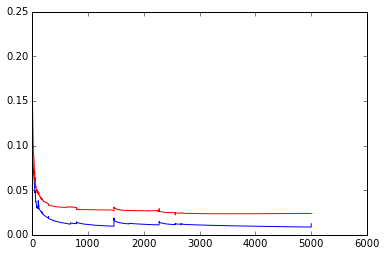

In [95]:
plt.plot(small_err[69][0],'b-')
plt.plot(small_err[69][1],'r-')

In [103]:
#36,70,4

In [104]:
print small_nets[small_idx]

FeedForwardNetwork-665
   Modules:
    [<BiasUnit 'bias'>, <LinearLayer 'in'>, <SigmoidLayer 'hidden0'>, <SigmoidLayer 'out'>]
   Connections:
    [<FullConnection 'FullConnection-661': 'bias' -> 'out'>, <FullConnection 'FullConnection-662': 'bias' -> 'hidden0'>, <FullConnection 'FullConnection-663': 'hidden0' -> 'out'>, <FullConnection 'FullConnection-664': 'in' -> 'hidden0'>]



In [105]:
small_net=small_nets[small_idx]

In [36]:
import pickle

In [106]:
f=open('small_net_4X3X3.net', 'w')
pickle.dump(small_net,f)
f.close()

In [37]:
f=open('small_net_4X3X3.net','r')
small_net=pickle.load(f)

In [3]:
small_train_ds=SupervisedDataSet.loadFromFile('small_train_ds_2X2X3')
small_test_ds=SupervisedDataSet.loadFromFile('small_test_ds_2X2X3')

In [4]:
small_nets=[]
small_err=[]
min_small_err=[]
for k in range(1,51):
    print k
    small_net=buildNetwork(12,k,4,bias=True,hiddenclass=SigmoidLayer,outclass=SigmoidLayer)
    small_trainer=BackpropTrainer(small_net,small_train_ds)
    small_err.append(small_trainer.trainUntilConvergence(maxEpochs=5000,continueEpochs=500,validationProportion=1/3.0))
    small_nets.append(small_net)

for e in small_err:
    min_small_err.append(min(e[1]))    
small_idx=min_small_err.index(min(min_small_err))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


27 0.0368932255243


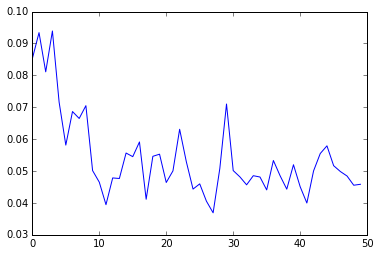

In [5]:
plt.plot(min_small_err)
print small_idx,(min_small_err[small_idx])

In [8]:
small_train_result=get_err_in_percent(small_nets[small_idx],small_train_ds)
small_train_result

28.0

In [9]:
small_test_result=get_err_in_percent(small_nets[small_idx],small_test_ds)
small_test_result

30.0

In [12]:
small_net=small_nets[small_idx]

In [13]:
f=open('small_net_2X2X3.net', 'w')
pickle.dump(small_net,f)
f.close()

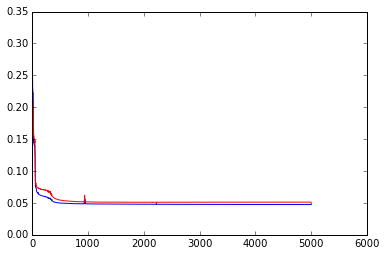

In [15]:
plt.plot(small_err[small_idx+1][0],'b-')
plt.plot(small_err[small_idx+1][1],'r-')

In [23]:
small_train_ds['input'][:,:12].shape

(300L, 12L)

In [13]:
small_nets=[]
small_err=[]
min_small_err=[]
for k in range(1,51):
    print k
    small_net=buildNetwork(48,k,4,bias=True,hiddenclass=SigmoidLayer,outclass=SigmoidLayer)
    small_trainer=BackpropTrainer(small_net,small_train_ds)
    small_err.append(small_trainer.trainUntilConvergence(maxEpochs=5000,continueEpochs=500,validationProportion=1/3.0))
    small_nets.append(small_net)

for e in small_err:
    min_small_err.append(min(e[1]))    
small_idx=min_small_err.index(min(min_small_err))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


29 0.0377336302806


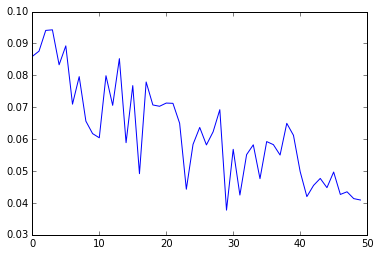

In [14]:
plt.plot(min_small_err)
print small_idx,(min_small_err[small_idx])

In [25]:
small_train_result=get_err_in_percent(small_nets[small_idx],small_train_ds)
small_train_result

15.666666666666657

In [24]:
small_test_result=get_err_in_percent(small_nets[small_idx],small_test_ds)
small_test_result

17.0

In [70]:
import pickle

In [147]:
f=open('small_net_2X2X3+12X3_v6.net','r')
small_net_v6=pickle.load(f)

In [148]:
small_train_result=get_err_in_percent(small_net_v6,small_train_ds)
small_train_result

28.888888888888886

In [149]:
small_test_result=get_err_in_percent(small_net_v6,small_test_ds)
small_test_result

35.333333333333343

In [142]:
small_net_v3.hidden

AttributeError: 'FeedForwardNetwork' object has no attribute 'hidden'

In [ ]:
small_train_ds=SupervisedDataSet.loadFromFile('small_train_ds_8X6X3')
small_test_ds=SupervisedDataSet.loadFromFile('small_test_ds_8X6X3')

In [ ]:
small_nets=[]
small_err=[]
min_small_err=[]
for k in range(1,51):
    print k
    small_net=buildNetwork(144,k,4,bias=True,hiddenclass=SigmoidLayer,outclass=SigmoidLayer)
    small_trainer=BackpropTrainer(small_net,small_train_ds)
    small_err.append(small_trainer.trainUntilConvergence(maxEpochs=5000,continueEpochs=500,validationProportion=1/3.0))
    small_nets.append(small_net)

for e in small_err:
    min_small_err.append(min(e[1]))    
small_idx=min_small_err.index(min(min_small_err))